<a href="https://colab.research.google.com/github/HaoYamado/notebooks/blob/master/PyTorch_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://miro.medium.com/max/2400/1*aqNgmfyBIStLrf9k7d9cng.jpeg)

# Logistic Regression on PyTorch

*Линейная регрессия: *

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

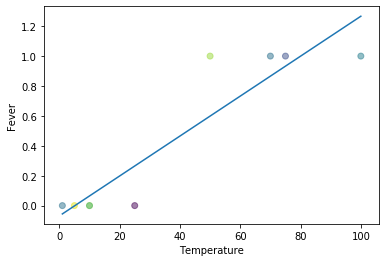

In [3]:
x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel('Fever')
plt.xlabel('Temperature')

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

## Логистическая регрессия in-depth

Prediction probability(прогнозирование вероятности):

1. Linear regression doesn't work (Линейная регрессия не работает)
2. Instead of predicting direct values: predict probability(вместо прогнозирования прямых значений: предсказывает вероятность)
![alt text](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/cross_entropy_final_4.png)

## Logistic Function g() (Логистическая функция g())

1. 'Two-class logistic regression' (Двухклассовая логистическая регрессия)



<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="bold-italic">y</mi>
  <mo>=</mo>
  <mi>A</mi>
  <mi mathvariant="bold-italic">x</mi>
  <mo>+</mo>
  <mi mathvariant="bold-italic">b</mi>
</math>, где y - вектор, содержащий предсказания 2-класса y_0 и y_1,
где метки y_0 = 0, y_1 = 1, также это вектор, а не матрица

---




# Building a Logistic Regression Model with Pytorch

In [4]:
"""
Step 1: Load Dataset
Step 2: Make Dataset iterable
Step 3: Create Model Class
Step 4: Instantiate Model Class
Step 5: Instantiate Loss Class
Step 6: Instantiate Optimizer CLass
Step 7: Train Model
"""
# Step 1: Loading MNIST Train Dataset

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

0it [00:00, ?it/s]

9920512it [00:03, 3078640.99it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 128885.23it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2116754.04it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 47501.57it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [5]:
len(train_dataset)

60000

In [6]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
type(train_dataset[0])

tuple

In [8]:
# inspecting training dataset first element of tuple
# input matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [9]:
# inspecting training dataset second element of tuple
""" The second element actually represetns the image's label. Meaning if second element says 5, it means the 28x28 
    matrix of number represents a digit 5."""
  
train_dataset[0][1]

5

### Displaying MNIST

In [10]:
# Verifying shape of MNIST image

""" As mentioned, a single MNIST image is of the shape 28 x 28 pixels """

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

train_dataset[0][0].numpy().shape

(1, 28, 28)

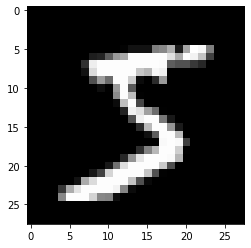

In [11]:
# Plot image of MNIST image
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')